In [1]:
import torchvision
import torch
import torchvision.transforms as transforms
import torch.nn as nn
import matplotlib.pyplot as plt

Training a simple MLP

In [2]:
class MLP(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(MLP, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, num_classes)

    def forward(self, x):
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        return x

Dataset

In [3]:
# MNIST dataset


train_dataset = torchvision.datasets.MNIST(
    root="../../data/", train=True, transform=transforms.ToTensor(), download=True
)

test_dataset = torchvision.datasets.MNIST(
    root="../../data/", train=False, transform=transforms.ToTensor()
)

In [4]:
len(train_dataset), len(test_dataset)

(60000, 10000)

In [5]:
# manipulating train_dataset and test_dataset so that the problem becomes a 3 vs not 3 problem

train_dataset.targets[train_dataset.targets != 3] = 0
train_dataset.targets[train_dataset.targets == 3] = 1
test_dataset.targets[test_dataset.targets != 3] = 0
test_dataset.targets[test_dataset.targets == 3] = 1

/tmp/ipykernel_10373/1759765500.py:3: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(3,3,i+1)


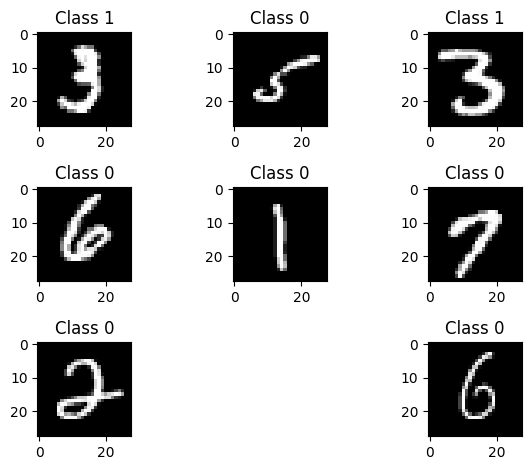

In [6]:
# Some images from train dataset
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(train_dataset.data[i + 10], cmap="gray", interpolation="none")
    plt.title("Class {}".format(train_dataset.targets[i + 10]))
    plt.tight_layout()

In [12]:
# Data loader

batch_size = 32

train_loader = torch.utils.data.DataLoader(
    dataset=train_dataset, batch_size=batch_size, shuffle=True
)

test_loader = torch.utils.data.DataLoader(
    dataset=test_dataset, batch_size=batch_size, shuffle=False
)

Model Training

In [13]:
# Hyperparameters
num_epochs = 5
learning_rate = 0.001


device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
model = MLP(784, 500, 2)
model.to(device)


criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

In [14]:
# Training loop

for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        images = images.reshape(-1, 28 * 28).to(device)
        labels = labels.to(device)
        outputs = model(images)
        loss = criterion(outputs, labels)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if (i + 1) % 100 == 0:
            print(
                "Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}".format(
                    epoch + 1, num_epochs, i + 1, len(train_loader), loss.item()
                )
            )

Epoch [1/5], Step [100/1875], Loss: 0.0797
Epoch [1/5], Step [200/1875], Loss: 0.1159
Epoch [1/5], Step [300/1875], Loss: 0.0255
Epoch [1/5], Step [400/1875], Loss: 0.0152
Epoch [1/5], Step [500/1875], Loss: 0.0368
Epoch [1/5], Step [600/1875], Loss: 0.0094
Epoch [1/5], Step [700/1875], Loss: 0.0130
Epoch [1/5], Step [800/1875], Loss: 0.0606
Epoch [1/5], Step [900/1875], Loss: 0.0117
Epoch [1/5], Step [1000/1875], Loss: 0.0099
Epoch [1/5], Step [1100/1875], Loss: 0.0068
Epoch [1/5], Step [1200/1875], Loss: 0.0132
Epoch [1/5], Step [1300/1875], Loss: 0.0128
Epoch [1/5], Step [1400/1875], Loss: 0.0721
Epoch [1/5], Step [1500/1875], Loss: 0.0138
Epoch [1/5], Step [1600/1875], Loss: 0.0023
Epoch [1/5], Step [1700/1875], Loss: 0.0744
Epoch [1/5], Step [1800/1875], Loss: 0.0039
Epoch [2/5], Step [100/1875], Loss: 0.0046
Epoch [2/5], Step [200/1875], Loss: 0.0710
Epoch [2/5], Step [300/1875], Loss: 0.0057
Epoch [2/5], Step [400/1875], Loss: 0.0128
Epoch [2/5], Step [500/1875], Loss: 0.0391
Ep

In [15]:
model.eval()
with torch.no_grad():
    correct = 0
    total = 0
    for images, labels in test_loader:
        images = images.reshape(-1, 28 * 28).to(device)
        labels = labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    print("Accuracy: {} %".format(100 * correct / total))

Accuracy: 99.49 %
